In [1]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#with zipfile.ZipFile('microdados_enem_2023.zip') as z:
#    print(*z.namelist(),sep="\n")

In [3]:
#with zipfile.ZipFile('microdados_enem_2023.zip') as z:
#    with z.open('DADOS/MICRODADOS_ENEM_2023.csv') as f:
#        %time microdados_enem = pd.read_csv(f,sep=';',encoding='ISO-8859-1')

In [4]:
# Filtra o dataset apenas para aqueles que participaram de todas as provas
#microdados_enem_filtrado = microdados_enem[(microdados_enem['TP_PRESENCA_CN'] == 1) & (microdados_enem['TP_PRESENCA_CH'] == 1) & (microdados_enem['TP_PRESENCA_LC'] == 1) & (microdados_enem['TP_PRESENCA_MT'] == 1)]

In [5]:
#dataset = microdados_enem_filtrado[['TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH',
#                           'NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q006']].dropna()
#dataset.to_csv('dataset.csv', index=False)

In [6]:
dataset = pd.read_csv('dataset.csv')

# Trata os dados
dataset['TP_SEXO'] = dataset['TP_SEXO'].map({'M': 0, 'F': 1})
dataset['TP_COR_RACA'] = dataset['TP_COR_RACA'].map({0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena'})
dataset['TP_ESCOLA'] = dataset['TP_ESCOLA'].map({1: 'Não Respondeu', 2: 'Pública', 3: 'Privada'})
dataset['TP_DEPENDENCIA_ADM_ESC'] = dataset['TP_DEPENDENCIA_ADM_ESC'].map({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'})
dataset['TP_LOCALIZACAO_ESC'] = dataset['TP_LOCALIZACAO_ESC'].map({1: 1, 2: 0})
dataset['Nota média'] = dataset[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)
dataset.columns = ['Sexo', 'Cor/Raça', 'Tipo de escola', 'Dependência administrativa da escola', 'Localização da escola_urbano', 'Nota de Ciências da Natureza', 'Nota de Ciências Humanas', 'Nota de Linguagens e Códigos', 'Nota de Matemática', 'Nota de Redação', 'Renda familiar', 'Nota média']
dataset.head()

,Sexo,Cor/Raça,Tipo de escola,Dependência administrativa da escola,Localização da escola_urbano,Nota de Ciências da Natureza,Nota de Ciências Humanas,Nota de Linguagens e Códigos,Nota de Matemática,Nota de Redação,Renda familiar,Nota média
0,1,Parda,Pública,Estadual,1,459.0,508.5,507.2,466.7,880.0,C,564.28
1,1,Parda,Pública,Estadual,1,402.5,379.2,446.9,338.3,560.0,B,425.38
2,0,Parda,Pública,Estadual,1,608.2,667.6,607.9,691.9,780.0,D,671.12
3,1,Branca,Pública,Estadual,1,515.7,553.1,544.4,437.0,880.0,B,586.04
4,0,Branca,Pública,Estadual,1,523.8,576.3,596.5,628.1,600.0,D,584.94


In [7]:
# Transforma as variáveis categóricas em dummies
df = pd.get_dummies(dataset, columns=['Cor/Raça', 'Tipo de escola', 'Dependência administrativa da escola', 'Renda familiar'])
df.head()

,Sexo,Localização da escola_urbano,Nota de Ciências da Natureza,Nota de Ciências Humanas,Nota de Linguagens e Códigos,Nota de Matemática,Nota de Redação,Nota média,Cor/Raça_Amarela,Cor/Raça_Branca,...,Renda familiar_H,Renda familiar_I,Renda familiar_J,Renda familiar_K,Renda familiar_L,Renda familiar_M,Renda familiar_N,Renda familiar_O,Renda familiar_P,Renda familiar_Q
0,1,1,459.0,508.5,507.2,466.7,880.0,564.28,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,402.5,379.2,446.9,338.3,560.0,425.38,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,1,608.2,667.6,607.9,691.9,780.0,671.12,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1,515.7,553.1,544.4,437.0,880.0,586.04,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,1,523.8,576.3,596.5,628.1,600.0,584.94,False,True,...,False,False,False,False,False,False,False,False,False,False


Irei excluir as colunas de Cor/Raça_Branca, Tipo de escola_Privada, Tipo de escola_ Não Respondeu, Dependência administrativa da escola_Privada, Renda familiar_A

Dessa forma, a comparação dos coeficientes da regressão serão as seguintes:

Cor/Raça em relação a brancos, Tipo de escola em relação a escolas privadas, Dependencia adm em relação a dependencia privada, renda familiar em relação a não ter renda

In [8]:
df = df.drop(columns=['Cor/Raça_Não declarado', 'Cor/Raça_Branca', 'Tipo de escola_Não Respondeu', 'Tipo de escola_Privada', 'Dependência administrativa da escola_Privada',
                 'Renda familiar_A'])
df.replace(False, 0, inplace=True)
df.replace(True, 1, inplace=True)
df.head()

# Renomeia as colunas
df.columns = ['Mulher', 'Escola Urbana', 'Nota de Ciências da Natureza', 'Nota de Ciências Humanas', 'Nota de Linguagens e Códigos', 'Nota de Matemática', 'Nota de Redação', 'Nota média', 'Amarela', 'Indígena', 'Parda', 'Preta', 'Escola Pública', 'Escola Estadual', 'Escola Federal', 'Escola Municipal', 'Renda familiar B', 'Renda familiar C', 'Renda familiar D', 'Renda familiar E', 'Renda familiar F', 'Renda familiar G', 'Renda familiar H', 'Renda familiar I', 'Renda familiar J', 'Renda familiar K', 'Renda familiar L', 'Renda familiar M', 'Renda familiar N', 'Renda familiar O', 'Renda familiar P', 'Renda familiar Q']

C:\Users\felip\AppData\Local\Temp\ipykernel_432\2399587185.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(True, 1, inplace=True)


In [9]:
# Faz uma regressão linear na nota média usando statsmodels
X = df.drop(columns=['Nota média', 'Nota de Ciências da Natureza', 'Nota de Ciências Humanas', 'Nota de Linguagens e Códigos', 'Nota de Matemática', 'Nota de Redação'])
X = sm.add_constant(X)
y = df['Nota média']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Nota média   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                 1.363e+04
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:33:25   Log-Likelihood:            -4.1923e+06
No. Observations:              721429   AIC:                         8.385e+06
Df Residuals:                  721402   BIC:                         8.385e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              528.3155      0.762  

In [10]:
from stargazer.stargazer import Stargazer
from IPython.display import display, HTML

stargazer = Stargazer([model])

display(HTML(stargazer.render_html()))


C:\Users\felip\AppData\Local\Temp\ipykernel_432\3489366349.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model.params[1:], y=model.params[1:].index, palette=['darkgoldenrod'])
C:\Users\felip\AppData\Local\Temp\ipykernel_432\3489366349.py:5: UserWarning: 
The palette list has fewer values (1) than needed (26) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=model.params[1:], y=model.params[1:].index, palette=['darkgoldenrod'])


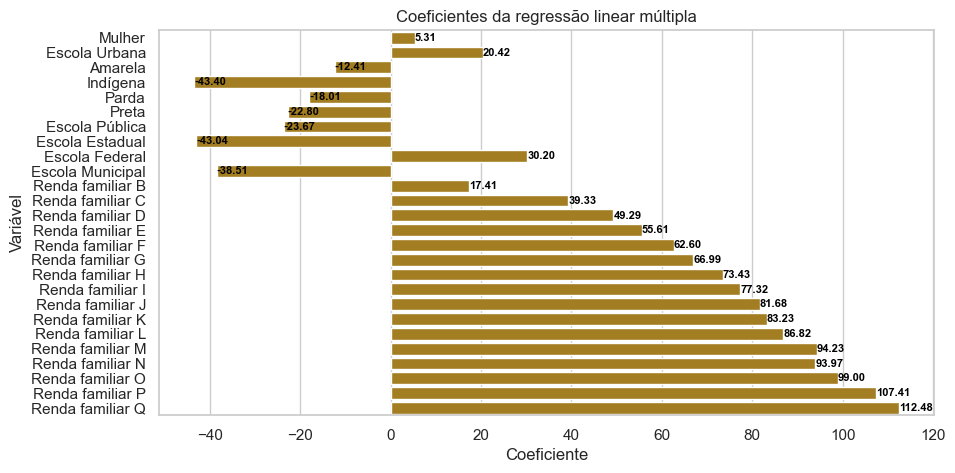

In [15]:

sns.set(style='whitegrid')
plt.rc('font', family='Arial', size=12)
plt.figure(figsize=(10, 5))

ax = sns.barplot(x=model.params[1:], y=model.params[1:].index, palette=['darkgoldenrod'])

# Adiciona os valores dos coeficientes nas barras
for i, v in enumerate(model.params[1:]):
    ax.text(v, i, f'{v:.2f}', color='black', va='center', fontweight='bold', fontsize=8)

plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.title('Coeficientes da regressão linear múltipla')
plt.gca().set_facecolor('white')
plt.show()

# Explicação do gráfico:

O gráfico mostra os coeficientes de uma Regressão Linear Múltipla das variáveis selecionadas sobre a nota média do enem 2023.

## Mulher: 
Mulheres, têm em média, 5.31 pontos na nota média a mais em relação a homens.
## Escola Urbana: 
Escolas em zonas urbanas tem em média 20.42 pontos a mais em relação a escolas localizadas em zonas rurais
## Autoidentificação racial: 
Pessoas que se autoidentificam como Amarela, Indígena, Parda ou Preta tem em médias notas menores que pessoas autoidentificadas como brancas (destaque para indígenas com coeficiente bem expressivo negativamente)
## Escola Pública: 
Estudantes de escola pública tem em média 43.04 pontos a menos que estudantes de escola particular
## Administração da escola: 
Escolas estaduais e municipais tem um desempenho médio inferior a escolas privadas. Porém, estudantes de escolas federais tem nota média maior em relação a estudantes de escolas privadas.
## Renda familiar: 
O IBGE classifica a renda familiar nos microdados do enem com letras indo de "A" até "Q". "A" representa o estudante sem renda (menor nível de renda), "B" o segundo menor nível de renda, "C" o terceiro menor e assim por diante até "Q" que é o maior nível. Pela "escada" formada pelos coeficientes vemos que conforme a renda familiar aumenta a nota média expressivamente em relação ao estudante sem renda.